In [130]:
import hickle
path = "/fast/ammannma/speech-separation/workspace/data/WSJ0/validation.pkl"
samples = hickle.load(open(path, 'rb'))
sample = samples[5]['Sample']
y = samples[5]['Target']
phase = samples[5]['Phase']

In [131]:
import IPython.display as ipd
import librosa
import librosa.display
import librosa.core
import numpy as np
import matplotlib.pyplot as plt

print(sample.shape)

t_phase = phase.transpose(1, 0)
spec = sample.transpose(1, 0)

print(np.max(spec))
spec = (spec * 14.850721) + 36.672416
#spec = (spec * 0.110788) + 0.038265
print(np.max(spec))
spec = 10 ** (spec / 20) / 10000
print(np.max(spec))
spec = spec * t_phase

print(spec.shape)

window=np.square(np.hanning(256))

wave = librosa.istft(spec, window=window, win_length=256,hop_length=64, center=False)[256//2:-256 // 2]
wave1 = librosa.istft(spec, window=window, win_length=256,hop_length=64, center=False)

print(wave.shape)
print(wave1.shape)

display(ipd.Audio(wave, rate=8000))
display(ipd.Audio(wave1, rate=8000))

print(wave)
print(wave1)

#display(ipd.Audio(librosa.istft(spec * y.transpose(2,1,0)[0], window=window,win_length=256, hop_length=64), rate=8000))
#display(ipd.Audio(librosa.istft(spec * y.transpose(2,1,0)[1], window=window, win_length=256,hop_length=64, center=True), rate=8000))

(100, 129)
3.3730297088623047
86.76433913102531
2.178797942833303
(129, 100)
(6336,)
(6592,)


[ 0.00024588  0.00020245  0.00040477 ... -0.01302713 -0.01432098
 -0.01498441]
[   0.         -55.81819     -4.0781207 ...  -39.680542  -506.20654
    0.       ]


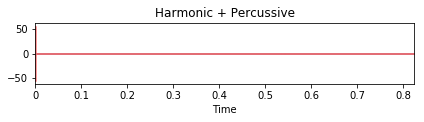

In [121]:
y, sr = (wave1, 8000)
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3, 1, 3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()
plt.show()